In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Impoting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Reading and Understanding Data

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/TY BTech Sem-5/AAI Projects/heart.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#get the size of dataframe
df.shape

(5110, 12)

There are 5110 rows and 12 columns in the dataset.

DATA PREPROCESSING

In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# handling missing values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Droping Id Columns

In [ ]:
df = df.drop(["id"],axis="columns")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Splitting Data into features and target column

In [ ]:
X=df.iloc[:,:-1] #feature
Y=df.iloc[:,10].values #classlabel
Y = df[['stroke']]
Y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


Converting Categorical data into Numerical Data

In [ ]:
# converting object data to integer
labelencoder_X=LabelEncoder()
X=X.apply(LabelEncoder().fit_transform)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,88,0,1,1,2,1,3850,240,1
1,0,82,0,0,1,3,0,3588,162,2
2,1,101,0,1,1,2,0,2483,199,2
3,0,70,0,0,1,2,1,3385,218,3
4,0,100,1,0,1,3,0,3394,113,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,2
5106,0,102,0,0,1,3,1,3030,274,2
5107,0,56,0,0,1,3,0,1314,180,2
5108,1,72,0,0,1,2,0,3363,129,1


Splitting data for training and testing

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
len(x_train),len(x_test),len(y_train),len(y_test)

(3832, 1278, 3832, 1278)

#1] Machine Learning Algorithms

**i) Naive Bayes Classification**

In [ ]:
naive=GaussianNB()
naive_model=naive.fit(x_train,y_train)
naive_model
print('The model has ran Successfully!!')

The model has ran Successfully!!


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_test['Predicted_NBC'] = naive_model.predict(x_test)

In [ ]:
y_test

,stroke,Predicted_NBC
4688,0,0
4478,0,0
3849,0,0
4355,0,1
3826,0,0
...,...,...
1533,0,0
2437,0,0
3164,0,0
92,1,0


In [ ]:
print(confusion_matrix(y_test['stroke'],y_test['Predicted_NBC']))

[[1083  115]
 [  51   29]]


In [ ]:
accuracy_nbc= accuracy_score(y_test['stroke'],y_test['Predicted_NBC'])
print('The Accuracy of Naive Bayes Calssification model is: ',accuracy_nbc)

The Accuracy of Naive Bayes Calssification model is:  0.8701095461658842


**ii) Decision Tree Classification**

In [ ]:
regressor = DecisionTreeClassifier(criterion = 'gini',max_depth=5,splitter='best')
regressor.fit(X,Y)

DecisionTreeClassifier(max_depth=5)

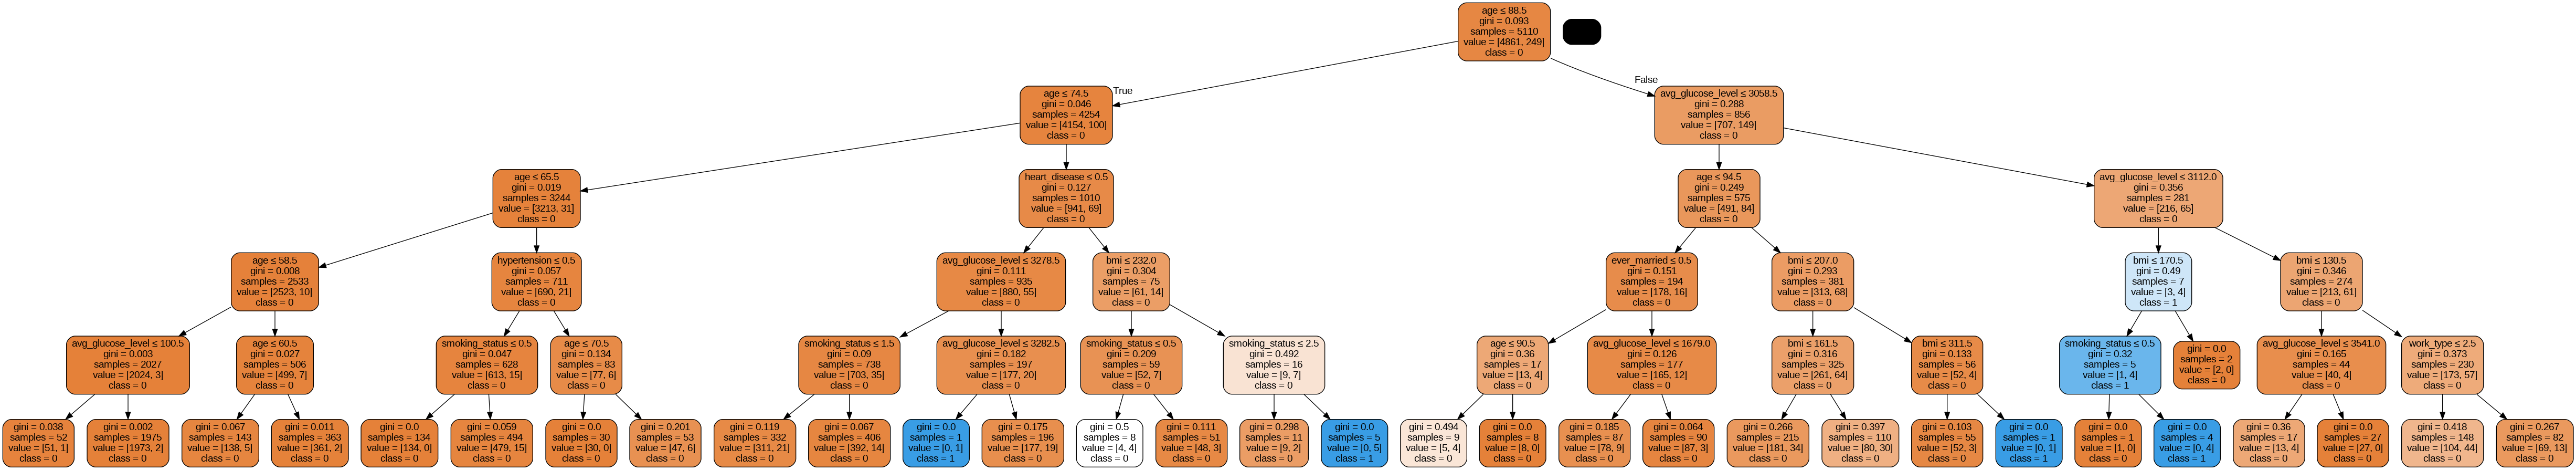

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
feature_cols=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
export_graphviz(regressor,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
y_test['Predicted_DTC'] = regressor.predict(x_test)

In [ ]:
y_test

,stroke,Predicted_NBC,Predicted_DTC
4688,0,0,0
4478,0,0,0
3849,0,0,0
4355,0,1,0
3826,0,0,0
...,...,...,...
1533,0,0,0
2437,0,0,0
3164,0,0,0
92,1,0,0


In [ ]:
print(confusion_matrix(y_test['stroke'],y_test['Predicted_DTC']))

[[1198    0]
 [  78    2]]


In [ ]:
accuracy_dtc= accuracy_score(y_test['stroke'],y_test['Predicted_DTC'])
print('The Accuracy of Decision Tree Classifier model is: ',accuracy_dtc)

The Accuracy of Decision Tree Classifier model is:  0.9389671361502347


**iii) Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf.fit(x_train, y_train)

# Make predictions on the test set
y_test['rf_predict'] = rf.predict(x_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test['stroke'], y_test['rf_predict'])
print('Random Forest Accuracy: ',accuracy_rf)


<ipython-input-27-706c498dc74f>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


Random Forest Accuracy:  0.9366197183098591


**iv) Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
lr = LogisticRegression(random_state=42)

# Train the Logistic Regression model
lr.fit(x_train, y_train)

# Make predictions on the test set
y_test['lr_predict'] = lr.predict(x_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test['stroke'], y_test['lr_predict'])
print('Logistic Regression Accuracy: ', accuracy_lr)


Logistic Regression Accuracy:  0.9358372456964006


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**v) Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM model
svm_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_test['svm_predict'] = svm_classifier.predict(x_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test['stroke'], y_test['svm_predict'])
print('SVM Accuracy: ', accuracy_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy:  0.9374021909233177


#2] Deep Learning Algorithms

**Artificial Neural Network (ANN) with Embedding Layers**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.optimizers import Adam

# Label Encoding for Categorical Features
label_encoder = LabelEncoder()

for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Prepare Data
X_numeric = df[numeric_features].values
X_categorical = df[categorical_features].values
y = df['stroke'].values

# Train-Test Split
X_numeric_train, X_numeric_test, X_categorical_train, X_categorical_test, y_train, y_test = train_test_split(
    X_numeric, X_categorical, y, test_size=0.2, random_state=42
)

# Numeric features
num_numeric_features = X_numeric_train.shape[1]
numeric_input = Input(shape=(num_numeric_features,))

# Categorical features
embedding_dim = 5
num_categories = 10

cat_inputs = []
embedding_layers = []

for i, cat_feature in enumerate(categorical_features):
    # Create input layer for each categorical feature
    cat_input = Input(shape=(1,), name=f'{cat_feature}_input')
    cat_inputs.append(cat_input)

    # Create embedding layer for each categorical feature
    embedding_layer = Embedding(input_dim=num_categories, output_dim=embedding_dim, name=f'{cat_feature}_embedding')(cat_input)
    flatten_layer = Flatten(name=f'{cat_feature}_flatten')(embedding_layer)
    embedding_layers.append(flatten_layer)

# Concatenate all flattened embedding layers
concatenated_embeddings = Concatenate()(embedding_layers)

# Concatenate both numeric and categorical features
concatenated_input = Concatenate()([numeric_input, concatenated_embeddings])

# Neural network layers
hidden_layer1 = Dense(64, activation='relu')(concatenated_input)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)

# Output layer
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

# Create the model
model = Model(inputs=[numeric_input] + cat_inputs, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([X_numeric_train] + [X_categorical_train[:, i] for i in range(X_categorical_train.shape[1])], y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([X_numeric_test] + [X_categorical_test[:, i] for i in range(X_categorical_test.shape[1])], y_test)
print('Test Accuracy: ',test_accuracy*100)

Epoch 1/10
103/103 [==============================] - 2s 7ms/step - loss: 0.2628 - accuracy: 0.9434 - val_loss: 0.1883 - val_accuracy: 0.9548
Epoch 2/10
103/103 [==============================] - 0s 4ms/step - loss: 0.2072 - accuracy: 0.9502 - val_loss: 0.1728 - val_accuracy: 0.9438
Epoch 3/10
103/103 [==============================] - 0s 4ms/step - loss: 0.1618 - accuracy: 0.9541 - val_loss: 0.1490 - val_accuracy: 0.9548
Epoch 4/10
103/103 [==============================] - 0s 3ms/step - loss: 0.1517 - accuracy: 0.9517 - val_loss: 0.2031 - val_accuracy: 0.9548
Epoch 5/10
103/103 [==============================] - 0s 3ms/step - loss: 0.1403 - accuracy: 0.9563 - val_loss: 0.1278 - val_accuracy: 0.9535
Epoch 6/10
103/103 [==============================] - 0s 3ms/step - loss: 0.1198 - accuracy: 0.9593 - val_loss: 0.1618 - val_accuracy: 0.9548
Epoch 7/10
103/103 [==============================] - 0s 4ms/step - loss: 0.1079 - accuracy: 0.9639 - val_loss: 0.0873 - val_accuracy: 0.9597
Epoch 

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 gender_input (InputLayer)   [(None, 1)]                  0         []                            
                                                                                                  
 ever_married_input (InputL  [(None, 1)]                  0         []                            
 ayer)                                                                                            
                                                                                                  
 work_type_input (InputLaye  [(None, 1)]                  0         []                            
 r)                                                                                               
                                                                                            

#RESULTS

Comparing Accuracies of all algorithms

In [2]:
accuracies = [accuracy_nbc,accuracy_dtc,accuracy_rf,accuracy_lr,accuracy_svm,test_accuracy]
print(accuracies)

[0.8701095461658842, 0.9389671361502347, 0.9366197183098591, 0.9358372456964006, 0.9374021909233177, 0.9941291809082031]


#Data Visualization

1] BAR GRAPH

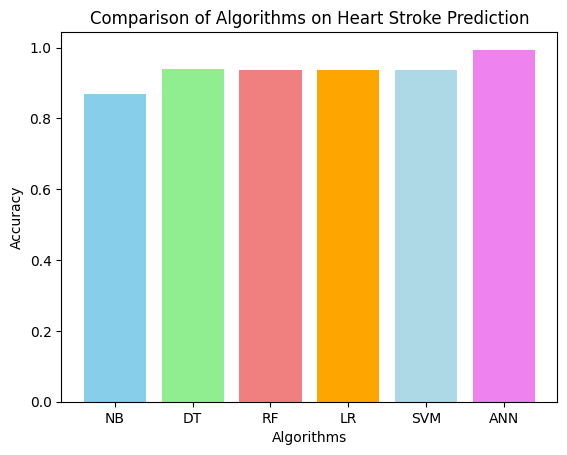

In [3]:
import matplotlib.pyplot as plt

algorithms = ['NB', 'DT', 'RF', 'LR', 'SVM','ANN']

colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightblue', 'violet']

plt.bar(algorithms, accuracies, color= colors)

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithms on Heart Stroke Prediction')

plt.show()
